In [ ]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


#                                               Lab 1 - Weightage - 3%

##  Decision Trees and Random Forests



### Dataset used : Amazon Fine food reviews.
### Maximum points in lab : 75 pts.
#### Important points to remember :
 1. Observations for the experiments done should be explained.
 2. All the code should be submitted in form of single Jupyter notebook itself.
 3. Points for each sub-section are mentioned in appropriate question.
 4. Make sure to begin early since few experiments may consume more time to run.
 5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
 6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
 7. __The lab is due on Feb 7th 11.59pm.__
 8. __The lab should be completed individually. Students are expected to follow the honor code of the class.__

### 1. Go through [scikit learn DecisionTree documentation] : https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
### Explain briefly various options available in corresponding DecisionTree classifier in scikit-learn package. [5 pts]




# Add your description of the function here.

The parameters available with the decision tree classifier

*   criterion:- To measure the quality of the split i.e. how pure have the splits been. Options:- gini(default), entropy
*   splitter:- Strategy chosen to split the node. Options:- best, random. In random, any random split is made. Options - best, random
*   min_samples_split:- Min number of samples required to split. Values - Positive integers
*   max_depth:- Maximum depth of the decision tree allowed. Values - Positive integers
*   min_samples_leaf:- Minimum number of samples required to be at the leaf node. A split will only be made if it has this much number of nodes in each of the splitted sub-trees. Values:- int (positive) or float(0-1)
*   min_weight_fraction_leaf:- The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Values - float
*   max_features :- The number of features to consider when looking for the best split. Values :- int, float or “auto”, “sqrt”, “log2”
*   random_state :- for cases where random splits are made, this defines the seed or the random_state of the decision tree. Values :- int or RandomState object
*   max_leaf_nodes :- The max number of leaf nodes that can be there in the tree. Values :- int
*   min_impurity_decrease :- A split is only made if the impurity decrease is above this benchmark. Values :- float
*   class_weight :- to induce weights to class, useful when train data is biased. Values - dict, list of dict or “balanced”
*   ccp_alpha:- complexity for Minimal Cost-Complexity Pruning. Values - non-negative float














The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5 
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

Out of above attributes we will consider <strong>Score as Y or Output variable</strong>, and  <strong>Summary as X or data points.</strong>



### Import Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn import model_selection
import pickle
import sqlite3
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.  Dataset loading, train test split, print two data points after converting score column into positive, negative class - [5 pts]
#### steps :
 Use score column as the output variable and Summary as the input variable
 1. Convert score column as score > 3 - positive class and score <=3 as negative class.
 2. Now define train test split as 0.25.

In [ ]:
# connecting to the dataset server to download the amazon fine foods dataset. Do not make any changes to the code below
con = sqlite3.connect("./amazon-fine-food-reviews/database.sqlite")

# con = sqlite3.connect('datasets/amazon-fine-food-reviews/database.sqlite')
messages = pd.read_sql_query("""
SELECT Score, Summary
FROM Reviews
""", con)

# the parition function applied threshold on the rating to label a review as 'positive' or 'negative'.
def partition(x):
   # insert your code here
    if x > 3:
      return 'positive'
    else:
      return 'negative'


Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']

# call the function to create the train and test splits according to the ratio 75:25
# uncomment and complete the line below

train_X, test_X, train_y, test_y = train_test_split(Summary, Score, test_size=0.25, random_state=42)

# print an example of the dataset after the labeling process
print(messages.head(2))
tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
print(tmp.head(2))

   Score                Summary
0      5  Good Quality Dog Food
1      1      Not as Advertised
      Score                Summary
0  positive  Good Quality Dog Food
1  negative      Not as Advertised


In [ ]:
# do not change make any changes to the code below. This part of the
# code removes stop words and transforms all the words and letters
# into a uniform representation. Further, it also removes punctuation
# marks.
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

corpus = []
count_train_x=0
for text in train_X:
    count_train_x=count_train_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_test_x=0
test_set=[]
for text in test_X:
    count_test_x=count_test_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
X_test_counts = count_vect.transform(test_set)

In [ ]:
# processing labels to correct ordering
train_labels = []
test_labels = []

for label in train_y:
    train_labels.append(label)

for label in test_y:
    test_labels.append(label)

### 4. Print before and after using data pre-processing for five data points - [5 pts]
For example, following are some outputs that we were able to generate

 ID | Before preprocessing | After preprocessing 
 -|-|-
 45612 | Good Strong Flavor|good strong flavor 
 180139 | GREAT SIDE DISH | great side dish 
 541273 | Its agar | it agar 
 102774 | Great product! | great product
 447382 | Love them | love them 

In [ ]:
# Data before the processing step is stored in the variable train_X 
# and the processed data is present in corpus. Print randomly 5 
# instances to check the success of the processing step. 
# insert your code here

# The output shown seems like the output of a pandas dataframe, hence doing the same

from random import randint

# Variable for the total size of the dataset
tot_size = len(Score)

val_id = []
bef_processing = []
aft_processing = []

no_proc = train_X.values

i = 0
while i < 5:
    val = randint(0, len(corpus)-1)

    if val in train_X:
      print()
      val_id.append(val)
      bef_processing.append(no_proc[val])
      aft_processing.append(corpus[val])
      i+=1

compare = list(zip(val_id, bef_processing, aft_processing))
compare_df = pd.DataFrame(compare, columns = ['ID', 'Before Preprocessing', 'After Preprocessing'])

compare_df

,ID,Before Preprocessing,After Preprocessing
0,147124,My dogs favorite and nutritious treat!,my dog favorit and nutriti treat
1,383771,Healthy soda alternative,healthi soda altern
2,152728,My very picky cats love it,my veri picki cat love it
3,64781,andes chips not what they were cracked up to be,and chip not what they were crack up to be
4,329223,cookies great....but too many broken ones,cooki great but too mani broken one


### 5. Build a basic decision tree choosing appropriate min_samples_leaf parameter so that tree fits in output cell using Graphviz package [5 pts]
Use the decision tree classifier from the sklearn library to learn a decision tree from the training dataet. For now, we would like to only visualize the tree to ensure that we are calling the correct function. Set the min_samples_leaf parameter to a high value (>15000) for learning the tree. This tree will not be accurate, but will be big enough for us to visualize it. Identify the functions in the tree package that will help to visualize the tree and plot it. Below is a sample tree generated when mi_samples_leaf was set to 20000
![tree.png](attachment:tree.png)

In [ ]:
from sklearn import tree
# insert your code here

dec_tree_classifier = tree.DecisionTreeClassifier(min_samples_leaf = 20000)

In [ ]:
dec_tree_classifier.fit(X_train_counts, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20000, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
train_preds = dec_tree_classifier.predict(X_train_counts)
test_preds = dec_tree_classifier.predict(X_test_counts)

In [ ]:
acc_train = accuracy_score(train_labels, train_preds)
acc_test = accuracy_score(test_labels, test_preds)
print(acc_train)
print(acc_test)

0.8036191771825304
0.8046779346158718


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


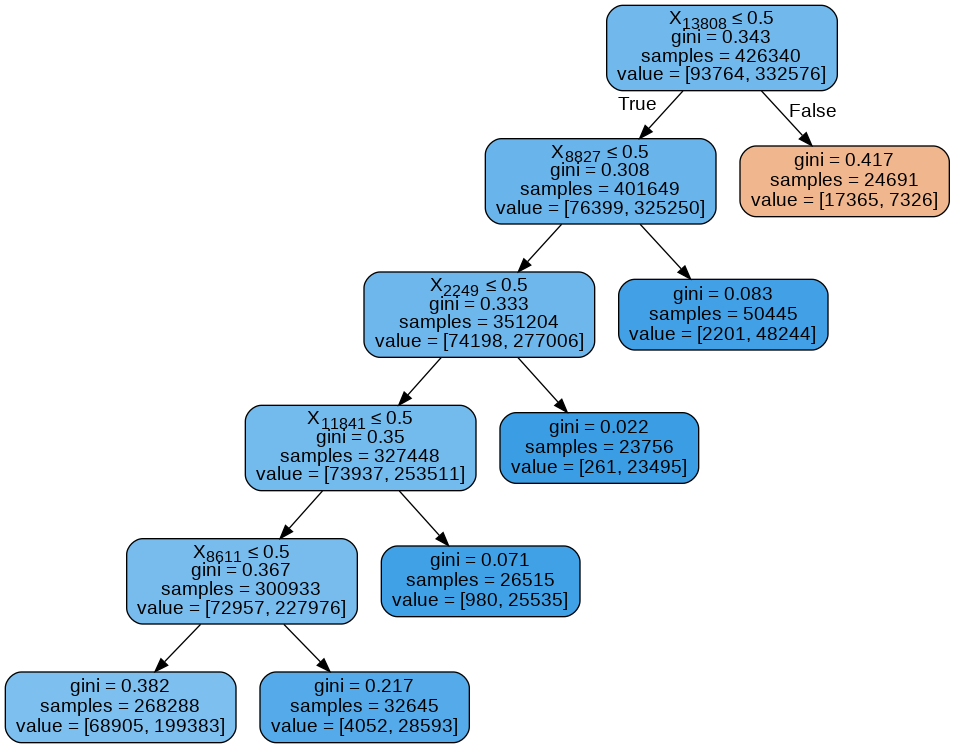

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dec_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 6. Experiments with different tree parameters
#### a. minimum number of samples in a node.  [5 pts]
By now we should have all the code in place for learning accurate decision trees. As we discussed in the class, one method to prevent overfitting a decision tree is to put constraints on the number of samples assigned to a split node during training. We had used this parameter to learn extremely short decision trees in the previous step. Let us now vary this parameter and investigate the impact on the train and test accuracy of the model. 
The first part of the code should loop around different values for min_samples_split and save the resulting train and test accuracy. In the second part, plot a graph with x-axis being the number of samples in the node and accuracy being the y axis. Plot both the train and test accuracies in the same figure. Write a generic function for the plotting as we will use it later for other visualizations.

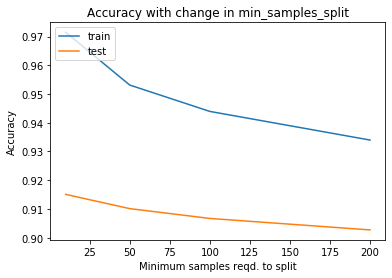

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
min_samples_split = [10,50,100,200]
for i in min_samples_split:
    # insert your code here
    dec_tree_classifier = tree.DecisionTreeClassifier(min_samples_split = i)
    dec_tree_classifier.fit(X_train_counts, train_labels)
    train_preds = dec_tree_classifier.predict(X_train_counts)
    test_preds = dec_tree_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)
    
def plot_accuracy(test_accuracy_list,train_accuracy_list, x_axis_values, xlabel, ylabel, title):
    # insert your code here
    plt.subplot(1,1,1)
    plt.plot(x_axis_values, train_accuracy_list)  # train loss (on epoch end)
    plt.plot(x_axis_values, test_accuracy_list)         #  test loss (on epoch end)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['train', 'test'], loc="upper left")
    
plot_accuracy(test_accuracy_list,train_accuracy_list, min_samples_split, 'Minimum samples reqd. to split', 'Accuracy', 'Accuracy with change in min_samples_split')

**OBSERVATIONS:**- min_samples_split gives the minimum number of samples necessary in order to split the data. It is done as a measure to avoid overfitting, hence the decrease in the training accuracies. However since the test accuracies decrease with an increase in the number of samples required, clearly for the given dataset, this measure does not work, since the model is not overfitting.

#### b. maximum number of leaf nodes in the tree [5 pts]
The tree learner has a parameter max_leaf_nodes. Discuss the role of this parameter during the tree learning. Investigate the impact of this parameter on the train and test accuracy.

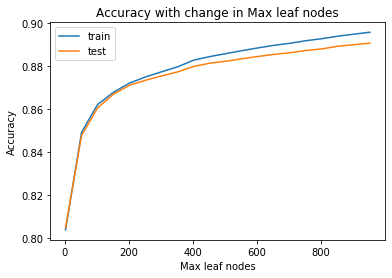

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
max_leaf_nodes_values = []
max_leaf_nodes=1000
step_size_2=50
for i in range(2, max_leaf_nodes,step_size_2):
    # insert your code here
    max_leaf_nodes_values.append(i)
    dec_tree_classifier = tree.DecisionTreeClassifier(max_leaf_nodes = i)
    dec_tree_classifier.fit(X_train_counts, train_labels)
    train_preds = dec_tree_classifier.predict(X_train_counts)
    test_preds = dec_tree_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)

plot_accuracy(test_accuracy_list,train_accuracy_list, max_leaf_nodes_values, 'Max leaf nodes', 'Accuracy', 'Accuracy with change in Max leaf nodes')

**OBSERVATIONS:-** max_leaf_nodes parameter refers to the maximum number of leaves the given decision tree can have. With more number of of leaf nodes, the model can learn a more complex function hence the better test and train accuracies

#### c. splitting criteria [5 pts]
Identify the default splitting critera and experiment with other criterion implemented in the tree package. Report the accuracy on the test dataset as well as other parameters chracterizing the learned decision tree. 

The default splitting criteria is Gini. The other criterion is entropy that can be used

In [ ]:
import time

test_accuracy_list=[]
train_accuracy_list=[]
train_time = []
criteria = ['gini', 'entropy']
for i in criteria:
    # insert your code here
    dec_tree_classifier = tree.DecisionTreeClassifier(criterion = i, )
    t0 = time.time()
    dec_tree_classifier.fit(X_train_counts, train_labels)
    t1 = time.time()
    train_preds = dec_tree_classifier.predict(X_train_counts)
    test_preds = dec_tree_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)
    train_time.append(t1-t0)

print('Train accuracy with Gini ' + str(train_accuracy_list[0]))
print('Test accuracy with Gini ' + str(test_accuracy_list[0]))
print('Training time Gini ' + str(train_time[0]))
print('Train accuracy with Entropy ' + str(train_accuracy_list[1]))
print('Test accuracy with Entropy ' + str(test_accuracy_list[1]))
print('Training time Entropy ' + str(train_time[1]))

Train accuracy with Gini 0.9853403386968147
Test accuracy with Gini 0.9128798007233629
Training time Gini 173.32305645942688
Train accuracy with Entropy 0.9853403386968147
Test accuracy with Entropy 0.9139634378034536
Training time Entropy 155.87404918670654


**OBSERVATIONS:-** Entropy criterion performs better and takes less time than the Gini criterion for the given dataset.

#### d. depth of the decision tree [5 pts]
Investigate the impact of depth of the decision tree on the test accuracy

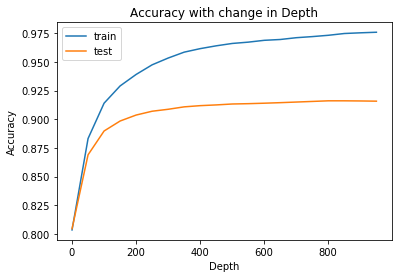

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
depth = []
maximum_depth=1000
step_size=50
for i in range(1, maximum_depth,step_size):
    #insert your code here
    depth.append(i)
    dec_tree_classifier = tree.DecisionTreeClassifier(max_depth = i)
    dec_tree_classifier.fit(X_train_counts, train_labels)
    train_preds = dec_tree_classifier.predict(X_train_counts)
    test_preds = dec_tree_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)


plot_accuracy(test_accuracy_list,train_accuracy_list, depth, 'Depth', 'Accuracy', 'Accuracy with change in Depth')

**OBSERVATIONS:-** With more depth, we can approximate more complex functions which give us an increase initially, but then both training and testing accuracies start to plateau, with test accuracies earlier than that of training accuracy since the model generalises on the training data, which leads to increase in the training accuracy but not the test accuracy.

### 7. Random forest
Now, let us explore an ensemble of decision trees - random forest. Fortunately, sklearn has an ensemble library containing the random forest classifier. Let us learn a random forest using both instance and feature bagging independently.
#### a. briefly describe the input parameters to the random forest classifier [5 pts]

The parameters to Random Forest are :-

*   n_estimators :- number of trees in the forest. Values :- positive int
*   criterion :- The criteria to split a node. Values 'gini' or 'entropy'
*   min_samples_split:- Min number of samples required to split. Values int, float
*   max_depth:- Maximum depth of the decision tree allowed. Values - int
*   min_samples_leaf:- Minimum number of samples required to be at the leaf node. A split will only be made if it has this much number of nodes in each of the splitted sub-trees. Values - int, float
*   max_features :- The number of features to consider when looking for the best split. Values - int, float, string
*   random_state :- for cases where random splits are made, this defines the seed or the random_state of the decision tree. Values - int or RandomState object
*   max_leaf_nodes :- The max number of leaf nodes that can be there. Values - int, float
*   min_impurity_decrease :- A split is only made if the impurity decrease is above this benchmark. Values - float
*   class_weight :- to induce weights to class, useful when train data is biased. Values - dict, list of dicts, “balanced”, “balanced_subsample” or None
*   bootstrap :- Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree. Values - bool
*   oob_score :- Whether to use out-of-bag samples to estimate the generalization accuracy. Values - boolean
*   n_jobs:- The number of jobs to run in parallel. Values - int or None
*   max_samples :- If bootstrap is true then it takes the number of instances. Values - int or float


#### b. instance bagging [10 pts]
As discussed in the class, instances are sampled with replacement to create multiple synthetic training sets. Decision tree is learned for every training set. An ensemble strategy (majority voting) is applied on the output of all the trees for a test instance. Let us vary the number of instances in each bag to learn the random forest and check if there is impact on the performance of the ensemble. 

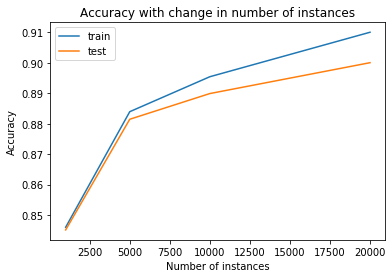

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import random
test_accuracy_list=[]
train_accuracy_list=[]
number_of_instances = [1000,5000,10000,20000]

# Get clarity on random state
for i in number_of_instances:
    # insert your code here
    # max_samples
    ran_forest_classifier = RandomForestClassifier(max_samples = i, random_state = 0, n_jobs = -1)
    ran_forest_classifier.fit(X_train_counts, train_labels)
    train_preds = ran_forest_classifier.predict(X_train_counts)
    test_preds = ran_forest_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)
    

plot_accuracy(test_accuracy_list,train_accuracy_list, number_of_instances, 'Number of instances', 'Accuracy', 'Accuracy with change in number of instances')

**OBSERVATIONS:-** Here increasing the number of instances increases the training and testing accuracies. Since each tree in the forest now gets trained on more instances, the data fed to each tree is better represents the instance space. Hence individually every tree makes better voting decisions.

Number of trees = 100

#### c. feature bagging [10 pts]
For performing feature bagging, we sample a subset of features from the initial set of features. A decision tree is learned for every training set that contains all the instances characterized by a subset of features. An ensemble strategy is applied for classifying a test instance. In this experiment we will investigate the impact of varying the number of features bagged on the test accuracy.

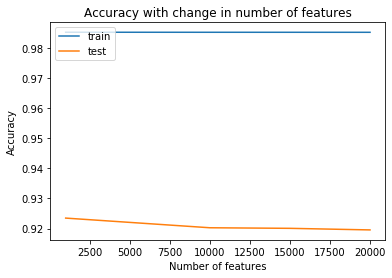

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
test_accuracy_list=[]
train_accuracy_list=[]
number_of_features = [1000,10000,15000,20000]
for i in number_of_features:
    # insert your code here
    # max_features
    ran_forest_classifier = RandomForestClassifier(max_features = i, random_state = 0, n_jobs = -1)
    ran_forest_classifier.fit(X_train_counts, train_labels)
    train_preds = ran_forest_classifier.predict(X_train_counts)
    test_preds = ran_forest_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)
    
plot_accuracy(test_accuracy_list,train_accuracy_list, number_of_features, 'Number of features', 'Accuracy', 'Accuracy with change in number of features')

**OBSERVATIONS:-** We achieve almost a constant training accuracy for the dataset however the test accuracy decreases with more number of features when taken. This is in-line with our expactations where taking a lesser number of features decreases the variance which results in better predictions.

Number of trees = 100(default)

#### d. number of trees in the forest [10 pts]
Finally let us vary the number of trees in the random forest. We will use the default random forest classifier and only vary the number of trees learned in the ensemble. Again make your observations on the test accuracy as the number of trees are varied.

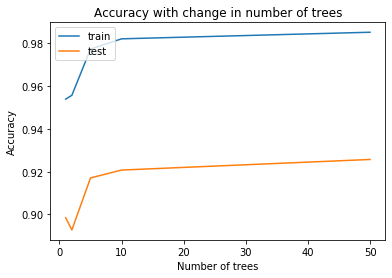

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
number_of_trees = [1,2,5,10,50]
for i in number_of_trees:
    # insert your code here
    # n_estimators
    ran_forest_classifier = RandomForestClassifier(n_estimators = i, random_state = 0, n_jobs = -1)
    ran_forest_classifier.fit(X_train_counts, train_labels)
    train_preds = ran_forest_classifier.predict(X_train_counts)
    test_preds = ran_forest_classifier.predict(X_test_counts)
    acc_train = accuracy_score(train_labels, train_preds)
    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracy_list.append(acc_test)
    train_accuracy_list.append(acc_train)

    
plot_accuracy(test_accuracy_list,train_accuracy_list, number_of_trees, 'Number of trees', 'Accuracy', 'Accuracy with change in number of trees')

**OBSERVATIONS:-** Accuracies increase with an increase in trees. Since the trees are independent to one another, adding more trees does not lead to overfitting, hence the results. 